### 1. Import bibliotek
#### 🇬🇧 Import libraries

In [ ]:
!pip install fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize

     |████████████████████████████████| 719 kB 4.3 MB/s 
     |████████████████████████████████| 197 kB 41.4 MB/s 
     |████████████████████████████████| 1.2 MB 47.0 MB/s 
     |████████████████████████████████| 60 kB 6.9 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/PUM08/dataset')
path = Path('/content/drive/My Drive/PUM08/dataset')

Mounted at /content/drive


### 2. Brakuje danych treningowych?
#### 🇬🇧 Lack of data?

... zawsze możemy w tym celu skorzystać z zasobów Internetu i pobrać dane z Internetu. Uważaj jednak na słowa, które wpisujesz - w końcu pobierasz automatycznie dane z Internetu i nie chcesz mieć na swoim dysku Google dziwnych rzeczy ;)

... we can always download data from the Internet. However, be careful with the keywords that you type - you are going to automatically download data from the Internet and you don't want to have strange things on your Google Drive ;)

In [ ]:
klasy = 'Lithobates sylvaticus', 'Pelophylax lessonae', 'Lithobates palustris' # w tym miejscu wpisujemy nazwę obiektu, który chcemy wyszukać np. 'pies' i 'kot'
path = Path('treningowe') # podajemy nazwę folderu, w którym znajdą się pliki
if not path.exists(): # folder zostanie dla nas stworzony, jeżeli jeszcze go nie mamy
  path.mkdir()
  for o in klasy:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {o} frog', max_images=113) # w miejsce keyword podajemy dodatkowe słowo kluczowe do wyszukiwarki np. "zwierzaki"
    download_images(dest, urls=urls)

### 3. Trenowanie modelu
#### 🇬🇧 Model training

In [ ]:
classes = ['Lithobates sylvaticus', 'Pelophylax lessonae', 'Lithobates palustris']

In [ ]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42), #valid_pct -> ile do wytrenowania ile do testowania (tutaj 20% do testu, 80% do nauczenia)
    get_y=parent_label,
    item_tfms=Resize(256) #resize -> do jednego rozmiaru zdjęcia, dla szczegółow duża rozdzielczość, inaczej 128 ok
)

In [ ]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5), # Określamy ilość materiałów treningowych oraz walidacyjnych, wielkość zdjęć, augmentację
    batch_tfms=aug_transforms(max_rotate=2.0) # celowo wpływamy graficznie na materiał treningowy, aby polepszyć klasyfikacje
)
dls = data.dataloaders(path, bs = 32, num_workers = 0) #num_workers 0 dla windowsa, 1 dla unixa
# W fastai 2.0 dane przedstawiane są w formie DataBlock, to tutaj dokonujemy augmentacji danych

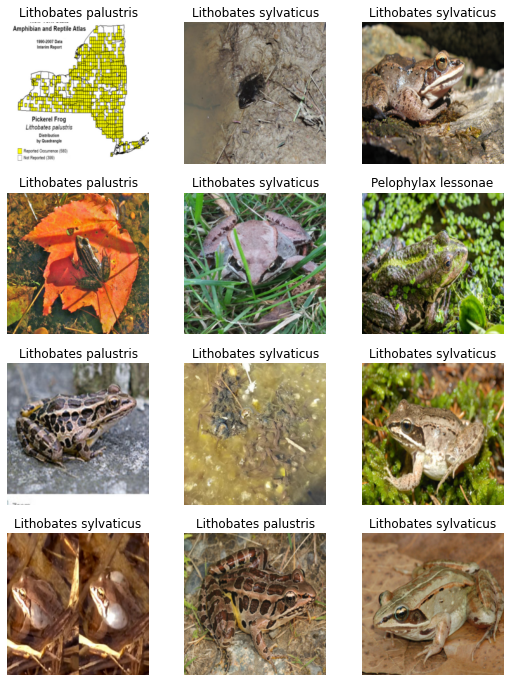

In [ ]:
dls.valid.show_batch(max_n=12, nrows=4)

In [ ]:
learn = vision_learner(dls, alexnet, metrics=accuracy) #alexnet -> prosta sieć, kilkanaście warstw

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.440750,0.873974,0.714286,00:11
1,0.466002,0.818084,0.746032,00:11


In [ ]:
learn.save('stage-1')

Path('models/stage-1.pth')

In [ ]:
learn.export(fname='model.pkl')

Dalszą część pracy wykonujemy w skrypcie app.py - chcemy zbudować aplikację do stworzonego przez nas modelu w Streamlit.

 Now we are ready to work with app.py - we want to build application using Streamlit.

https://share.streamlit.io/s20404/froggy/main/app.py
